In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import files

**Question 1.** 

You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

Note: You have to code the logic from scratch

In [0]:
def myfunc(a):
  l = len(a)
  a.sort()
  m_index = a.index(np.median(a))
  q1 = np.median(a[:m_index])
  if l%2!=0:
    q2 = np.median(a[m_index+1:])## for even data points q2 is conted twice so index+1
    
  else:
    q2 = np.median(a[m_index:])

  print("Interquartile range(IQR) is :",q2-q1)


data = 1, 19, 7, 6, 5, 9, 12, 27, 18, 2, 15  


after sorting data : 1, 2, 5, 6, 7, 9, 12, 15, 18, 19, 27

now we have odd data points,


so median of sorted data (q2): 9

q1 = median of the data present before q2 = 5

q3 = median of the data present after q2 = 18

q3-q1 = 13


In [68]:
myfunc([1, 19, 7, 6, 5, 9, 12, 27, 18, 2, 15])

Interquartile range(IQR) is : 13.0


data = 1, 3, 4, 5, 5, 6, 7, 11 


after sorting data : 1, 3, 4, 5, 5, 6, 7, 11

now we have even data points,


so median of sorted data (q2): 5

q1 = median of the data present before q2 = 3.5

q3 = median of the data present after q2 = 6.5

q3-q1 = 3

In [69]:
myfunc([1, 3, 4, 5, 5, 6, 7, 11])

Interquartile range(IQR) is : 3.0


**Question 2:**

 Plot a histogram for total team scores for all IPL games.

Note: Per match 2 teams will play hence total number scores would be = no. of matches * 2

In [70]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['deliveries.csv'].decode('utf-8')))
df.head()

Saving deliveries.csv to deliveries (1).csv


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [0]:
data = (df.groupby(['match_id','batting_team']).sum()['total_runs']).values

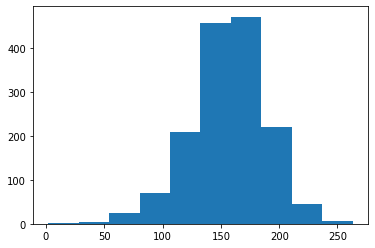

In [84]:
plt.hist(data)
plt.show()

Question 3.

Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

Note : if you don't know about economy read this https://en.wikipedia.org/wiki/Economy_rate_(cricket)


In [0]:
dff = df.groupby('bowler').count()

dff = dff[dff['ball']>300]
bowler_list = dff.index.tolist()

final = df[df['bowler'].isin(bowler_list)]

In [95]:
dff

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
bowler,,,,,,,,,,,,,,,,,,,,
A Kumble,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,49,49,36
A Mishra,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,3172,165,165,123
A Mithun,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,8,8,6
A Nehra,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,121,121,91
A Singh,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,34,34,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Sundar,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,358,17,17,13
YK Pathan,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,46,46,29
YS Chahal,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841,102,102,76


In [0]:
runs = final.groupby('bowler')['total_runs'].sum()
balls = final.groupby('bowler').count()['ball']
eco_rate = runs/(balls/6)

In [93]:
eco_rate

Series([], dtype: float64)

0.3639680377271646


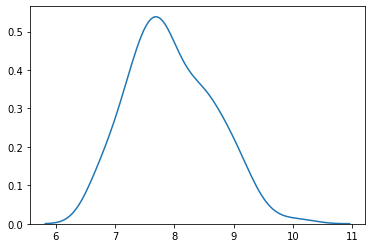

In [76]:

print(eco_rate.skew())
sns.kdeplot(eco_rate)

Question 4:

Give three examples of negatively skewed data and 3 examples of positively skewed data


3.2034787957431052


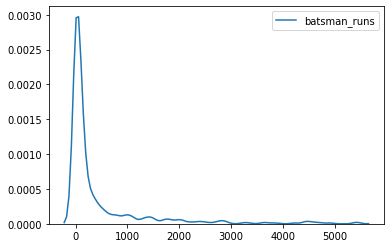

In [77]:
## positive skew 
runs=df.groupby('batsman')['batsman_runs'].sum()
print(runs.skew())
sns.kdeplot(runs)

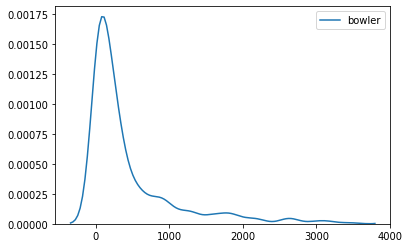

In [78]:
x=df['bowler'].value_counts() ## positive skew 
x.skew()
sns.kdeplot(x)

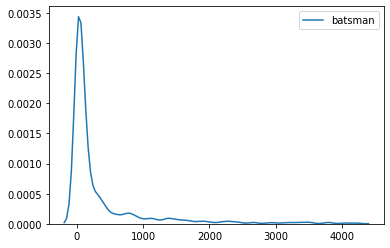

In [79]:
x=df['batsman'].value_counts() ## positive skew 
x.skew()
sns.kdeplot(x)

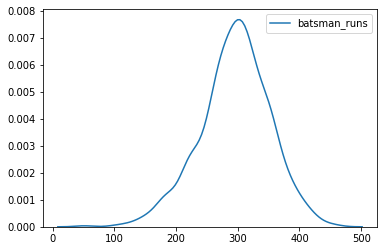

In [80]:
mat=df.groupby('match_id')['batsman_runs'].sum() ## negative skew
mat.skew()
sns.kdeplot(mat)

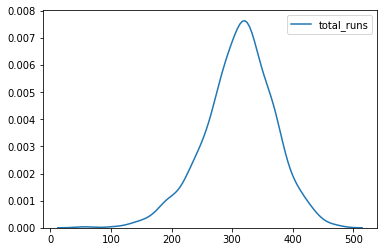

In [81]:
total_runs = df.groupby('match_id')['total_runs'].sum() ## negative skew
total_runs.skew()
sns.kdeplot(total_runs)

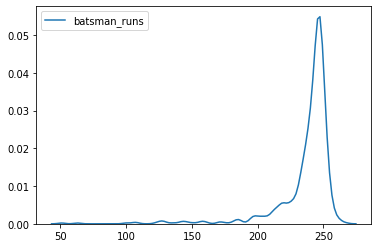

In [113]:
extra = df.groupby('match_id')['batsman_runs'].count() ## negative skew
extra.skew()
sns.kdeplot(extra)